# Comparative analysis of detection of spam e-mail

### Importing necessary modules

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
from os import walk
from string import punctuation
from random import shuffle
from collections import Counter
import multiprocessing
import email


import sklearn as sk

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samyu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samyu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samyu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\samyu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\samyu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import time

### Importing raw data from source path

In [3]:
import os

for (root, dirs, files) in os.walk(r"C:\Users\samyu\Downloads\archive (1)", topdown=True):
    print(root)
    print(dirs)
    print(files)

C:\Users\samyu\Downloads\archive (1)
['enron1', 'enron2', 'enron3', 'enron4', 'enron5', 'enron6']
[]
C:\Users\samyu\Downloads\archive (1)\enron1
['ham', 'spam']
['Summary.txt']
C:\Users\samyu\Downloads\archive (1)\enron1\ham
[]
['0001.1999-12-10.farmer.ham.txt', '0002.1999-12-13.farmer.ham.txt', '0003.1999-12-14.farmer.ham.txt', '0004.1999-12-14.farmer.ham.txt', '0005.1999-12-14.farmer.ham.txt', '0007.1999-12-14.farmer.ham.txt', '0009.1999-12-14.farmer.ham.txt', '0010.1999-12-14.farmer.ham.txt', '0011.1999-12-14.farmer.ham.txt', '0012.1999-12-14.farmer.ham.txt', '0013.1999-12-14.farmer.ham.txt', '0014.1999-12-15.farmer.ham.txt', '0015.1999-12-15.farmer.ham.txt', '0016.1999-12-15.farmer.ham.txt', '0019.1999-12-15.farmer.ham.txt', '0020.1999-12-15.farmer.ham.txt', '0021.1999-12-15.farmer.ham.txt', '0022.1999-12-16.farmer.ham.txt', '0023.1999-12-16.farmer.ham.txt', '0024.1999-12-16.farmer.ham.txt', '0025.1999-12-16.farmer.ham.txt', '0027.1999-12-17.farmer.ham.txt', '0028.1999-12-17.farmer

In [77]:
pathwalk = walk(r"C:\Users\samyu\Downloads\archive (1)")

HamData, SpamData = [], []
for root, dr, file in pathwalk:
    if 'ham' in str(file):
        for obj in file:
            with open(root + '/' + obj, encoding='latin1') as ip:
                HamData.append(" ".join(ip.readlines()))
                
    elif 'spam' in str(file):
        for obj in file:
            with open(root + '/' + obj, encoding='latin1') as ip:
                SpamData.append(" ".join(ip.readlines()))

In [78]:
# Removing redundant data
HamData = list(set(HamData))
SpamData = list(set(SpamData))

In [79]:
HamData

['Subject: california update 07 . 09 . 01\n the bond legislation\n the democrats in the assembly and sentate have agreed to language to create a dedicated rate component to repay the budget and de - link the bonds from the dwr contracts .\n but the republicans have still not agreed to go along .\n the bill would require a 2 / 3 \' s vote to keep the bond issuance on schedule , so republican votes are necessary .\n the republicans are trying to meet tonite or tomorrow to determine whether to go along .\n the conference committee\n senator burton does not like the idea of a conference committee and at this point prefers to use the existing committee structure to hear the core / noncore proposal .\n using the existing committee structure could take longer to produce a bill than using the conference committee structure , but how much longer is uncertain .\n no sense yet of when hearings on the core / noncore proposal - - - in conference committee or otherwise - - will take place , though b

In [81]:
allData = HamData + SpamData # storing it in a dataframe
labels = ["ham"]*len(HamData) + ["spam"]*len(SpamData)

raw_df = pd.DataFrame({"email": allData, 
                       "label": labels})

In [82]:
raw_df.shape

(30493, 2)

In [83]:
raw_df.head(5)

email  \
0  Subject: california update 07 . 09 . 01\n the bond legislation\n the democrats in the assembly a...   
1  Subject: command confirmation request ( 4 e 46 c 824 )\n your command :\n subscribe frbnyrmagl v...   
2                             Subject: promotion\n vince ,\n congrats on your promotion to md .\n doug   
3  Subject: london visit\n hi maureen\n how many days are you coming over for ? in addition to the ...   
4  Subject: re : latest revision\n vince ,\n i got the zipped version fine . thanks the only outsta...   

  label  
0   ham  
1   ham  
2   ham  
3   ham  
4   ham

In [84]:
text = raw_df['email']
text

0        Subject: california update 07 . 09 . 01\n the bond legislation\n the democrats in the assembly a...
1        Subject: command confirmation request ( 4 e 46 c 824 )\n your command :\n subscribe frbnyrmagl v...
2                                   Subject: promotion\n vince ,\n congrats on your promotion to md .\n doug
3        Subject: london visit\n hi maureen\n how many days are you coming over for ? in addition to the ...
4        Subject: re : latest revision\n vince ,\n i got the zipped version fine . thanks the only outsta...
                                                        ...                                                 
30488    Subject: featured sto - ck positioned to grow\n pop 3 media corp ( popt )\n a company which has ...
30489    Subject: hershey  s * vs . ghirardelli * get $ 100 in gifts by taking our survey now .\n - you ...
30490    Subject: re : be hard for you .\n christmas time is around the corner and we are offering\n the ...
30491    Subject: i

In [85]:
print(raw_df.loc[1]['email'])

Subject: command confirmation request ( 4 e 46 c 824 )
 your command :
 subscribe frbnyrmagl vince kaminski
 has been received . you must now reply to this message ( as explained
 below ) to complete your subscription . the purpose of this confirmation
 procedure is to check that the address listserv is about to add to the
 list for your subscription is reachable . this is a typical procedure for
 high - volume lists and all new subscribers are subjected to it - you are
 not being singled out . every effort has been made to make this
 verification as simple and painless as possible . thanks in advance for
 your cooperation .
 to confirm the execution of your command , simply point your browser to
 the following url :
 alternatively , if you have no www access , you can reply to the present
 message and type " ok " ( without the quotes ) as the text of your message .
 just the word " ok " - do not retype the command . this procedure will work
 with any mail program that fully conforms t

In [86]:
print("shape of data:",raw_df.shape) 
print("\nno dimensions of data:",raw_df.ndim)
print("\nsize of data:",raw_df.size)
print("\nSum fo all null values:\n",raw_df.isnull().sum())

shape of data: (30493, 2)

no dimensions of data: 2

size of data: 60986

Sum fo all null values:
 email    0
label    0
dtype: int64


In [87]:
print("Column Names : ")
print(raw_df.columns)

Column Names : 
Index(['email', 'label'], dtype='object')


In [88]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30493 entries, 0 to 30492
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   30493 non-null  object
 1   label   30493 non-null  object
dtypes: object(2)
memory usage: 476.6+ KB


In [89]:
print("Count of label:\n",raw_df['label'].value_counts())

Count of label:
 ham     15910
spam    14583
Name: label, dtype: int64


In [90]:
raw_df['length'] = raw_df.email.str.len()
raw_df.head()

email  \
0  Subject: california update 07 . 09 . 01\n the bond legislation\n the democrats in the assembly a...   
1  Subject: command confirmation request ( 4 e 46 c 824 )\n your command :\n subscribe frbnyrmagl v...   
2                             Subject: promotion\n vince ,\n congrats on your promotion to md .\n doug   
3  Subject: london visit\n hi maureen\n how many days are you coming over for ? in addition to the ...   
4  Subject: re : latest revision\n vince ,\n i got the zipped version fine . thanks the only outsta...   

  label  length  
0   ham    1444  
1   ham    1647  
2   ham      69  
3   ham     320  
4   ham    3572

In [91]:
data=raw_df

### Data Pre-processing
Since the data is in raw form, the data is cleaned and transformed to a format that is suitable 
for analysis or model training

### 1. Removing punctutations

In [94]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [95]:
def remove_punc(text):
    nonP_text = "".join([char for char in text if char not in string.punctuation])
    return nonP_text

data["body_text_clean"] = data["email"].apply(lambda x: remove_punc(x))

data.head()

email  \
0  Subject: california update 07 . 09 . 01\n the bond legislation\n the democrats in the assembly a...   
1  Subject: command confirmation request ( 4 e 46 c 824 )\n your command :\n subscribe frbnyrmagl v...   
2                             Subject: promotion\n vince ,\n congrats on your promotion to md .\n doug   
3  Subject: london visit\n hi maureen\n how many days are you coming over for ? in addition to the ...   
4  Subject: re : latest revision\n vince ,\n i got the zipped version fine . thanks the only outsta...   

  label  length  \
0   ham    1444   
1   ham    1647   
2   ham      69   
3   ham     320   
4   ham    3572   

                                                                                       body_text_clean  
0  Subject california update 07  09  01\n the bond legislation\n the democrats in the assembly and ...  
1  Subject command confirmation request  4 e 46 c 824 \n your command \n subscribe frbnyrmagl vince...  
2                                Subject promotion\n vince \n congrats on your promotion to md \n doug  
3  Subject london visit\n hi maureen\n how many days are you coming over for  in addition to the co...  
4  Subject re  latest revision\n vince \n i got the zipped version fine  thanks the only outstandin...

### 2. Tokenization

In [97]:
import re

def tokenize(text):
    tokens = re.split("\W+", text)
    return tokens

data["body_text_tokenized"] = data["body_text_clean"].apply(lambda x: tokenize(x))

data.head()

email  \
0  Subject: california update 07 . 09 . 01\n the bond legislation\n the democrats in the assembly a...   
1  Subject: command confirmation request ( 4 e 46 c 824 )\n your command :\n subscribe frbnyrmagl v...   
2                             Subject: promotion\n vince ,\n congrats on your promotion to md .\n doug   
3  Subject: london visit\n hi maureen\n how many days are you coming over for ? in addition to the ...   
4  Subject: re : latest revision\n vince ,\n i got the zipped version fine . thanks the only outsta...   

  label  length  \
0   ham    1444   
1   ham    1647   
2   ham      69   
3   ham     320   
4   ham    3572   

                                                                                       body_text_clean  \
0  Subject california update 07  09  01\n the bond legislation\n the democrats in the assembly and ...   
1  Subject command confirmation request  4 e 46 c 824 \n your command \n subscribe frbnyrmagl vince...   
2                                Subject promotion\n vince \n congrats on your promotion to md \n doug   
3  Subject london visit\n hi maureen\n how many days are you coming over for  in addition to the co...   
4  Subject re  latest revision\n vince \n i got the zipped version fine  thanks the only outstandin...   

                                                                                   body_text_tokenized  
0  [Subject, california, update, 07, 09, 01, the, bond, legislation, the, democrats, in, the, assem...  
1  [Subject, command, confirmation, request, 4, e, 46, c, 824, your, command, subscribe, frbnyrmagl...  
2                             [Subject, promotion, vince, congrats, on, your, promotion, to, md, doug]  
3  [Subject, london, visit, hi, maureen, how, many, days, are, you, coming, over, for, in, addition...  
4  [Subject, re, latest, revision, vince, i, got, the, zipped, version, fine, thanks, the, only, ou...

### 3. Removing Stopwords

In [98]:
import nltk
stopwords = nltk.corpus.stopwords.words("english")

def remove_stopwords(token):
    text = [word for word in token if word not in stopwords]
    return text

data["body_text_nonstop"] = data["body_text_tokenized"].apply(lambda x: remove_stopwords(x))
data.head()

email  \
0  Subject: california update 07 . 09 . 01\n the bond legislation\n the democrats in the assembly a...   
1  Subject: command confirmation request ( 4 e 46 c 824 )\n your command :\n subscribe frbnyrmagl v...   
2                             Subject: promotion\n vince ,\n congrats on your promotion to md .\n doug   
3  Subject: london visit\n hi maureen\n how many days are you coming over for ? in addition to the ...   
4  Subject: re : latest revision\n vince ,\n i got the zipped version fine . thanks the only outsta...   

  label  length  \
0   ham    1444   
1   ham    1647   
2   ham      69   
3   ham     320   
4   ham    3572   

                                                                                       body_text_clean  \
0  Subject california update 07  09  01\n the bond legislation\n the democrats in the assembly and ...   
1  Subject command confirmation request  4 e 46 c 824 \n your command \n subscribe frbnyrmagl vince...   
2                                Subject promotion\n vince \n congrats on your promotion to md \n doug   
3  Subject london visit\n hi maureen\n how many days are you coming over for  in addition to the co...   
4  Subject re  latest revision\n vince \n i got the zipped version fine  thanks the only outstandin...   

                                                                                   body_text_tokenized  \
0  [Subject, california, update, 07, 09, 01, the, bond, legislation, the, democrats, in, the, assem...   
1  [Subject, command, confirmation, request, 4, e, 46, c, 824, your, command, subscribe, frbnyrmagl...   
2                             [Subject, promotion, vince, congrats, on, your, promotion, to, md, doug]   
3  [Subject, london, visit, hi, maureen, how, many, days, are, you, coming, over, for, in, addition...   
4  [Subject, re, latest, revision, vince, i, got, the, zipped, version, fine, thanks, the, only, ou...   

                                                                                     body_text_nonstop  
0  [Subject, california, update, 07, 09, 01, bond, legislation, democrats, assembly, sentate, agree...  
1  [Subject, command, confirmation, request, 4, e, 46, c, 824, command, subscribe, frbnyrmagl, vinc...  
2                                           [Subject, promotion, vince, congrats, promotion, md, doug]  
3  [Subject, london, visit, hi, maureen, many, days, coming, addition, couple, days, spending, broo...  
4  [Subject, latest, revision, vince, got, zipped, version, fine, thanks, outstanding, items, relat...

### 4. Stemming

In [100]:
ps = nltk.PorterStemmer()

def stemming(t_text):
    text = [ps.stem(word) for word in t_text]
    return text

data["body_text_stemmed"] = data["body_text_nonstop"].apply(lambda x: stemming(x))
data.head()

email  \
0  Subject: california update 07 . 09 . 01\n the bond legislation\n the democrats in the assembly a...   
1  Subject: command confirmation request ( 4 e 46 c 824 )\n your command :\n subscribe frbnyrmagl v...   
2                             Subject: promotion\n vince ,\n congrats on your promotion to md .\n doug   
3  Subject: london visit\n hi maureen\n how many days are you coming over for ? in addition to the ...   
4  Subject: re : latest revision\n vince ,\n i got the zipped version fine . thanks the only outsta...   

  label  length  \
0   ham    1444   
1   ham    1647   
2   ham      69   
3   ham     320   
4   ham    3572   

                                                                                       body_text_clean  \
0  Subject california update 07  09  01\n the bond legislation\n the democrats in the assembly and ...   
1  Subject command confirmation request  4 e 46 c 824 \n your command \n subscribe frbnyrmagl vince...   
2                                Subject promotion\n vince \n congrats on your promotion to md \n doug   
3  Subject london visit\n hi maureen\n how many days are you coming over for  in addition to the co...   
4  Subject re  latest revision\n vince \n i got the zipped version fine  thanks the only outstandin...   

                                                                                   body_text_tokenized  \
0  [Subject, california, update, 07, 09, 01, the, bond, legislation, the, democrats, in, the, assem...   
1  [Subject, command, confirmation, request, 4, e, 46, c, 824, your, command, subscribe, frbnyrmagl...   
2                             [Subject, promotion, vince, congrats, on, your, promotion, to, md, doug]   
3  [Subject, london, visit, hi, maureen, how, many, days, are, you, coming, over, for, in, addition...   
4  [Subject, re, latest, revision, vince, i, got, the, zipped, version, fine, thanks, the, only, ou...   

                                                                                     body_text_nonstop  \
0  [Subject, california, update, 07, 09, 01, bond, legislation, democrats, assembly, sentate, agree...   
1  [Subject, command, confirmation, request, 4, e, 46, c, 824, command, subscribe, frbnyrmagl, vinc...   
2                                           [Subject, promotion, vince, congrats, promotion, md, doug]   
3  [Subject, london, visit, hi, maureen, many, days, coming, addition, couple, days, spending, broo...   
4  [Subject, latest, revision, vince, got, zipped, version, fine, thanks, outstanding, items, relat...   

                                                                                     body_text_stemmed  
0  [subject, california, updat, 07, 09, 01, bond, legisl, democrat, assembl, sentat, agre, languag,...  
1  [subject, command, confirm, request, 4, e, 46, c, 824, command, subscrib, frbnyrmagl, vinc, kami...  
2                                                   [subject, promot, vinc, congrat, promot, md, doug]  
3  [subject, london, visit, hi, maureen, mani, day, come, addit, coupl, day, spend, brook, hunt, se...  
4  [subject, latest, revis, vinc, got, zip, version, fine, thank, outstand, item, relat, complet, r...

### 5. Lemmatization

In [23]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(t_text):
    text = [wn.lemmatize(word) for word in t_text]
    return text

data["body_text_lemmatized"] = data["body_text_stemmed"].apply(lambda x: lemmatizer(x))
data.head()

email label  length  \
0  Subject: california update 07 . 09 . 01\n the ...   ham    1444   
1  Subject: command confirmation request ( 4 e 46...   ham    1647   
2  Subject: promotion\n vince ,\n congrats on you...   ham      69   
3  Subject: london visit\n hi maureen\n how many ...   ham     320   
4  Subject: re : latest revision\n vince ,\n i go...   ham    3572   

                                     body_text_clean  \
0  Subject california update 07  09  01\n the bon...   
1  Subject command confirmation request  4 e 46 c...   
2  Subject promotion\n vince \n congrats on your ...   
3  Subject london visit\n hi maureen\n how many d...   
4  Subject re  latest revision\n vince \n i got t...   

                                 body_text_tokenized  \
0  [Subject, california, update, 07, 09, 01, the,...   
1  [Subject, command, confirmation, request, 4, e...   
2  [Subject, promotion, vince, congrats, on, your...   
3  [Subject, london, visit, hi, maureen, how, man...   
4  [Subject, re, latest, revision, vince, i, got,...   

                                   body_text_nonstop  \
0  [Subject, california, update, 07, 09, 01, bond...   
1  [Subject, command, confirmation, request, 4, e...   
2  [Subject, promotion, vince, congrats, promotio...   
3  [Subject, london, visit, hi, maureen, many, da...   
4  [Subject, latest, revision, vince, got, zipped...   

                                   body_text_stemmed  \
0  [subject, california, updat, 07, 09, 01, bond,...   
1  [subject, command, confirm, request, 4, e, 46,...   
2  [subject, promot, vinc, congrat, promot, md, d...   
3  [subject, london, visit, hi, maureen, mani, da...   
4  [subject, latest, revis, vinc, got, zip, versi...   

                                body_text_lemmatized  
0  [subject, california, updat, 07, 09, 01, bond,...  
1  [subject, command, confirm, request, 4, e, 46,...  
2  [subject, promot, vinc, congrat, promot, md, d...  
3  [subject, london, visit, hi, maureen, mani, da...  
4  [subject, latest, revis, vinc, got, zip, versi...

In [101]:
data['body_text_length'] = data.email.str.len()
data['body_text_clean_length'] = data.body_text_clean.str.len()

data.head()

email  \
0  Subject: california update 07 . 09 . 01\n the bond legislation\n the democrats in the assembly a...   
1  Subject: command confirmation request ( 4 e 46 c 824 )\n your command :\n subscribe frbnyrmagl v...   
2                             Subject: promotion\n vince ,\n congrats on your promotion to md .\n doug   
3  Subject: london visit\n hi maureen\n how many days are you coming over for ? in addition to the ...   
4  Subject: re : latest revision\n vince ,\n i got the zipped version fine . thanks the only outsta...   

  label  length  \
0   ham    1444   
1   ham    1647   
2   ham      69   
3   ham     320   
4   ham    3572   

                                                                                       body_text_clean  \
0  Subject california update 07  09  01\n the bond legislation\n the democrats in the assembly and ...   
1  Subject command confirmation request  4 e 46 c 824 \n your command \n subscribe frbnyrmagl vince...   
2                                Subject promotion\n vince \n congrats on your promotion to md \n doug   
3  Subject london visit\n hi maureen\n how many days are you coming over for  in addition to the co...   
4  Subject re  latest revision\n vince \n i got the zipped version fine  thanks the only outstandin...   

                                                                                   body_text_tokenized  \
0  [Subject, california, update, 07, 09, 01, the, bond, legislation, the, democrats, in, the, assem...   
1  [Subject, command, confirmation, request, 4, e, 46, c, 824, your, command, subscribe, frbnyrmagl...   
2                             [Subject, promotion, vince, congrats, on, your, promotion, to, md, doug]   
3  [Subject, london, visit, hi, maureen, how, many, days, are, you, coming, over, for, in, addition...   
4  [Subject, re, latest, revision, vince, i, got, the, zipped, version, fine, thanks, the, only, ou...   

                                                                                     body_text_nonstop  \
0  [Subject, california, update, 07, 09, 01, bond, legislation, democrats, assembly, sentate, agree...   
1  [Subject, command, confirmation, request, 4, e, 46, c, 824, command, subscribe, frbnyrmagl, vinc...   
2                                           [Subject, promotion, vince, congrats, promotion, md, doug]   
3  [Subject, london, visit, hi, maureen, many, days, coming, addition, couple, days, spending, broo...   
4  [Subject, latest, revision, vince, got, zipped, version, fine, thanks, outstanding, items, relat...   

                                                                                     body_text_stemmed  \
0  [subject, california, updat, 07, 09, 01, bond, legisl, democrat, assembl, sentat, agre, languag,...   
1  [subject, command, confirm, request, 4, e, 46, c, 824, command, subscrib, frbnyrmagl, vinc, kami...   
2                                                   [subject, promot, vinc, congrat, promot, md, doug]   
3  [subject, london, visit, hi, maureen, mani, day, come, addit, coupl, day, spend, brook, hunt, se...   
4  [subject, latest, revis, vinc, got, zip, version, fine, thank, outstand, item, relat, complet, r...   

   body_text_length  body_text_clean_length  
0              1444                    1411  
1              1647                    1600  
2                69                      66  
3               320                     310  
4              3572                    3273

In [102]:
data['body_text_length']

0        1444
1        1647
2          69
3         320
4        3572
         ... 
30488    4424
30489     237
30490     485
30491    1021
30492      59
Name: body_text_length, Length: 30493, dtype: int64

In [103]:
print("Original Length:",data['body_text_length'].sum())
print("Cleaned Length:",data['body_text_clean_length'].sum())
print("Total Words Removed:",(data['body_text_length'].sum()) - (data['body_text_clean_length'].sum()))

Original Length: 46035043
Cleaned Length: 43881594
Total Words Removed: 2153449


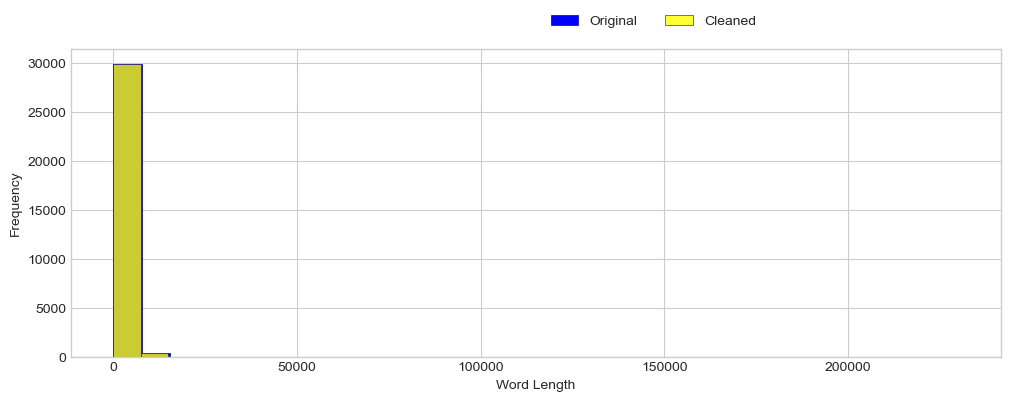

In [107]:
data['body_text_length'].plot(bins=30, kind='hist', figsize=(12, 4), color='blue', edgecolor='darkblue', linewidth=0.5)
data['body_text_clean_length'].plot(bins=30, kind='hist', figsize=(12, 4), alpha=0.8, color='yellow', edgecolor='darkblue', linewidth=0.5)
plt.xlabel("Word Length")
plt.legend(['Original', 'Cleaned'], bbox_to_anchor=(0.75, 1.15), ncol=2)
plt.show()


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30493 entries, 0 to 30492
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   email                   30493 non-null  object
 1   label                   30493 non-null  object
 2   length                  30493 non-null  int64 
 3   body_text_clean         30493 non-null  object
 4   body_text_tokenized     30493 non-null  object
 5   body_text_nonstop       30493 non-null  object
 6   body_text_stemmed       30493 non-null  object
 7   body_text_length        30493 non-null  int64 
 8   body_text_clean_length  30493 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.1+ MB


### Exploratory Data Analysis

In [32]:
data_eda=data

In [109]:
data_eda['num_characters'] = data['email'].apply(len) #storing the total number of characters in each email in a new column
data_eda['num_words'] = data['email'].apply(lambda x:len(nltk.word_tokenize(x))) # storing the number of words in each email
data_eda['num_sentences'] = data['email'].apply(lambda x:len(nltk.sent_tokenize(x))) # storing the number of sentences
data_eda.head()

email  \
0  Subject: california update 07 . 09 . 01\n the bond legislation\n the democrats in the assembly a...   
1  Subject: command confirmation request ( 4 e 46 c 824 )\n your command :\n subscribe frbnyrmagl v...   
2                             Subject: promotion\n vince ,\n congrats on your promotion to md .\n doug   
3  Subject: london visit\n hi maureen\n how many days are you coming over for ? in addition to the ...   
4  Subject: re : latest revision\n vince ,\n i got the zipped version fine . thanks the only outsta...   

  label  length  \
0   ham    1444   
1   ham    1647   
2   ham      69   
3   ham     320   
4   ham    3572   

                                                                                       body_text_clean  \
0  Subject california update 07  09  01\n the bond legislation\n the democrats in the assembly and ...   
1  Subject command confirmation request  4 e 46 c 824 \n your command \n subscribe frbnyrmagl vince...   
2                                Subject promotion\n vince \n congrats on your promotion to md \n doug   
3  Subject london visit\n hi maureen\n how many days are you coming over for  in addition to the co...   
4  Subject re  latest revision\n vince \n i got the zipped version fine  thanks the only outstandin...   

                                                                                   body_text_tokenized  \
0  [Subject, california, update, 07, 09, 01, the, bond, legislation, the, democrats, in, the, assem...   
1  [Subject, command, confirmation, request, 4, e, 46, c, 824, your, command, subscribe, frbnyrmagl...   
2                             [Subject, promotion, vince, congrats, on, your, promotion, to, md, doug]   
3  [Subject, london, visit, hi, maureen, how, many, days, are, you, coming, over, for, in, addition...   
4  [Subject, re, latest, revision, vince, i, got, the, zipped, version, fine, thanks, the, only, ou...   

                                                                                     body_text_nonstop  \
0  [Subject, california, update, 07, 09, 01, bond, legislation, democrats, assembly, sentate, agree...   
1  [Subject, command, confirmation, request, 4, e, 46, c, 824, command, subscribe, frbnyrmagl, vinc...   
2                                           [Subject, promotion, vince, congrats, promotion, md, doug]   
3  [Subject, london, visit, hi, maureen, many, days, coming, addition, couple, days, spending, broo...   
4  [Subject, latest, revision, vince, got, zipped, version, fine, thanks, outstanding, items, relat...   

                                                                                     body_text_stemmed  \
0  [subject, california, updat, 07, 09, 01, bond, legisl, democrat, assembl, sentat, agre, languag,...   
1  [subject, command, confirm, request, 4, e, 46, c, 824, command, subscrib, frbnyrmagl, vinc, kami...   
2                                                   [subject, promot, vinc, congrat, promot, md, doug]   
3  [subject, london, visit, hi, maureen, mani, day, come, addit, coupl, day, spend, brook, hunt, se...   
4  [subject, latest, revis, vinc, got, zip, version, fine, thank, outstand, item, relat, complet, r...   

                                                                                  body_text_lemmatized  \
0  [subject, california, updat, 07, 09, 01, bond, legisl, democrat, assembl, sentat, agre, languag,...   
1  [subject, command, confirm, request, 4, e, 46, c, 824, command, subscrib, frbnyrmagl, vinc, kami...   
2                                                   [subject, promot, vinc, congrat, promot, md, doug]   
3  [subject, london, visit, hi, maureen, mani, day, come, addit, coupl, day, spend, brook, hunt, se...   
4  [subject, latest, revis, vinc, got, zip, version, fine, thank, outstand, item, relat, complet, r...   

   body_text_length  body_text_clean_length  num_characters  num_words  \
0              1444                    1411            1444        267   
1           

In [111]:
data_eda[['num_characters','num_words','num_sentences']].describe()

num_characters     num_words  num_sentences
count    30493.000000  30493.000000   30493.000000
mean      1509.692159    308.223658      14.780737
std       4160.238422    821.776620      40.639132
min         10.000000      2.000000       1.000000
25%        360.000000     74.000000       4.000000
50%        737.000000    156.000000       8.000000
75%       1591.000000    333.000000      16.000000
max     230145.000000  45454.000000    2073.000000

In [112]:
data_eda[data_eda['label'] == 'ham'][['num_characters','num_words','num_sentences']].describe()

num_characters     num_words  num_sentences
count    15910.000000  15910.000000   15910.000000
mean      1659.482841    348.440541      14.903960
std       5439.578326   1075.162334      48.140404
min         13.000000      3.000000       1.000000
25%        355.000000     75.000000       4.000000
50%        815.000000    176.000000       7.000000
75%       1711.000000    370.000000      15.000000
max     230145.000000  45454.000000    2036.000000

In [113]:
data_eda[data_eda['label'] == 'spam'][['num_characters','num_words','num_sentences']].describe()

num_characters     num_words  num_sentences
count    14583.000000  14583.000000   14583.000000
mean      1346.271069    264.347185      14.646300
std       1964.309314    383.764069      30.414703
min         10.000000      2.000000       1.000000
25%        365.000000     73.000000       5.000000
50%        671.000000    139.000000       9.000000
75%       1420.000000    279.000000      17.000000
max      31407.000000   8403.000000    2073.000000

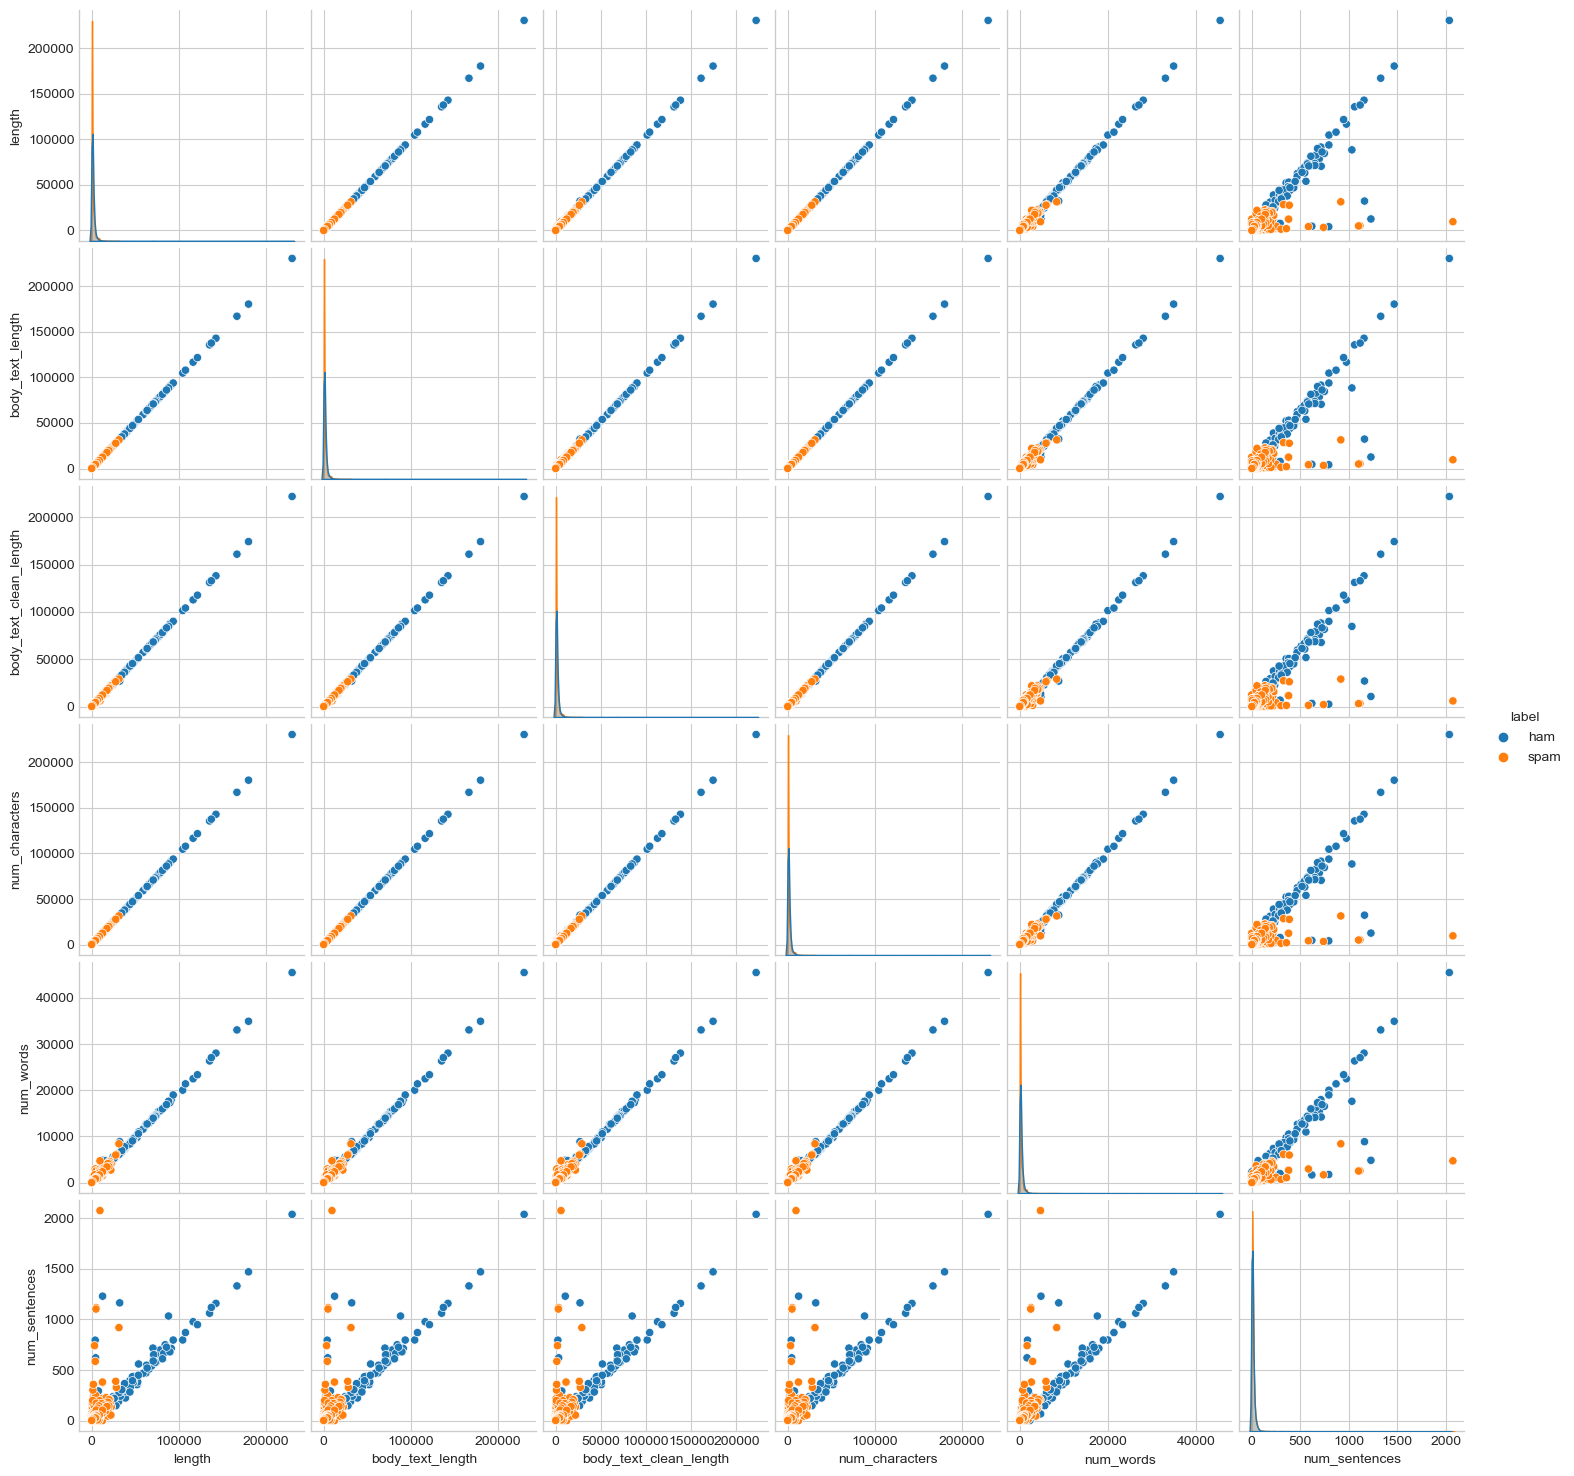

In [114]:
sns.pairplot(data_eda,hue='label')

<Axes: >

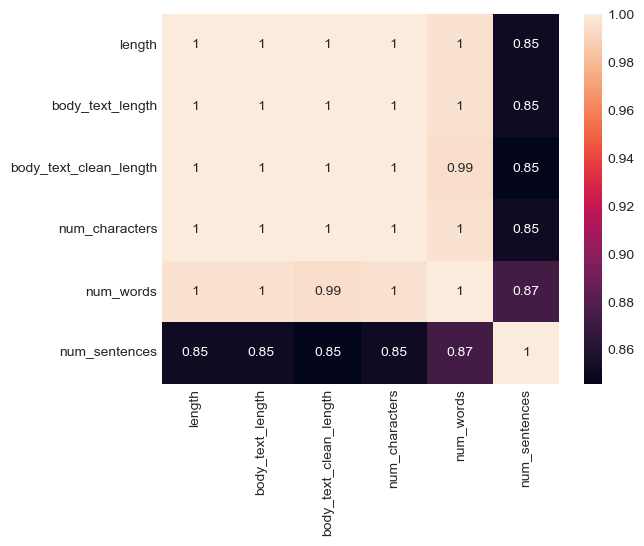

In [115]:
sns.heatmap(data_eda.corr(),annot=True)

C:\Users\samyu\AppData\Local\Temp\ipykernel_7528\1717786251.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid') # nice and clean grid


Text(0.5, 0, 'Word Length')

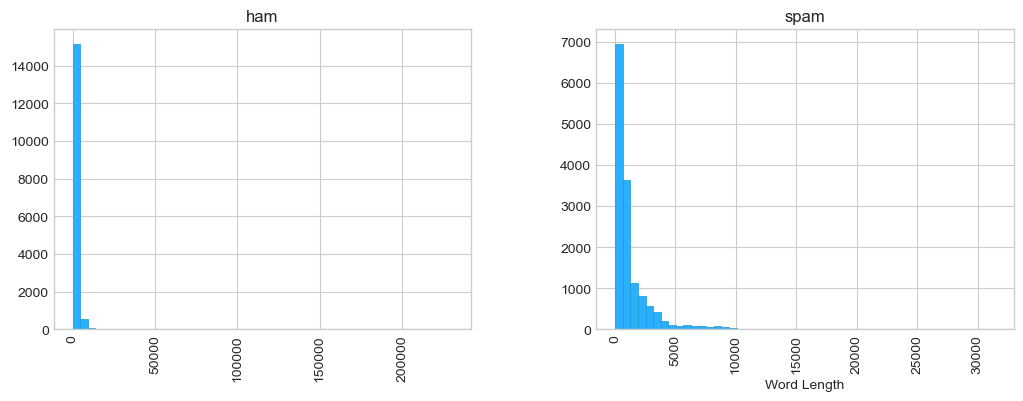

In [41]:
data.hist(column='body_text_length', by='label', bins=50,figsize=(12,4), facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5 );
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.xlabel("Word Length")

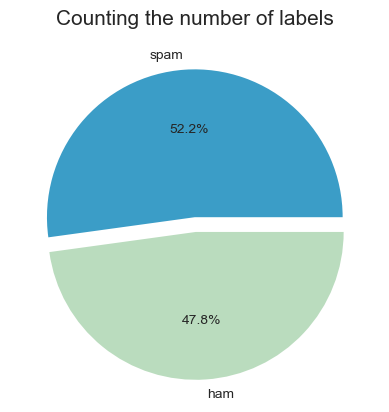

In [116]:
# couting number of ham and spam emails
explode = (0, 0.1)
colors = ['#3b9dc7','#badcbe']
plt.pie(data['label'].value_counts(), labels=['spam','ham'],autopct='%1.1f%%',colors=colors,explode=explode)
plt.title("Counting the number of labels",fontsize=15);
plt.show()

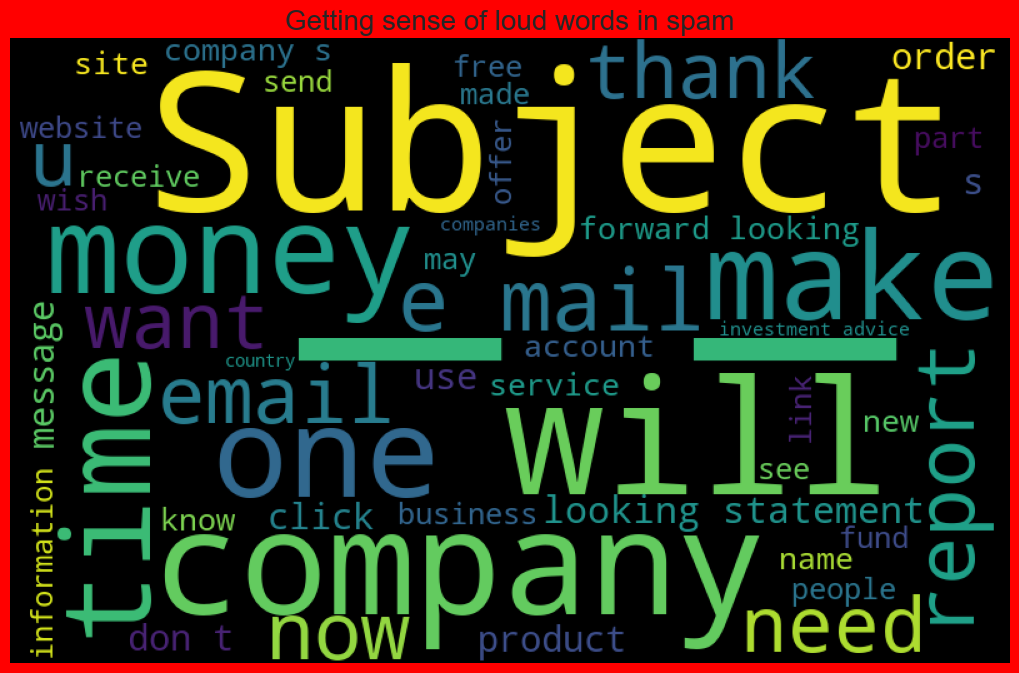

In [44]:
spams = data['email'][data['label']=='spam']

spam_cloud = WordCloud(width=800,height=500,background_color='black',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.title("Getting sense of loud words in spam",fontsize=20);
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

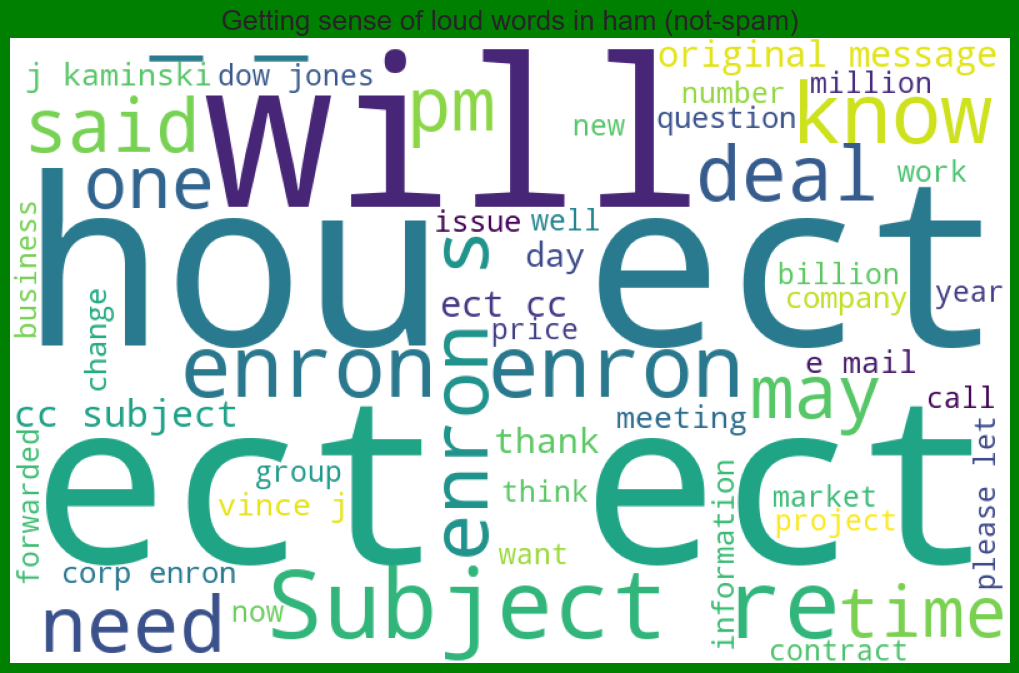

In [45]:
not_spams = data['email'][data['label']=='ham']

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(not_spams))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.title("Getting sense of loud words in ham (not-spam)",fontsize=20);

plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [46]:
data.to_csv("clean.csv") # storing cleaned data in a csv file

### Vectorizing data

In [117]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

def horizontal_bar_chart(data, color):
    trace = go.Bar(
        y=data["word"].values[::-1],
        x=data["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [118]:
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [119]:
def text_to_vector(text):
    word_vector = np.zeros(vocab_size)
    for word in text.split(" "):
        if word2idx.get(word) is None:
            continue
        else:
            word_vector[word2idx.get(word)] += 1
    return np.array(word_vector)
      # Convert all titles to vectors
    word_vectors = np.zeros((len(text), len(vocab)), dtype=np.int_)
    for i, (_, text_) in enumerate(text.iterrows()):
        word_vectors[i] = text_to_vector(text_[0])

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['email'])
vectors.shape

features = vectors
features

<30493x158288 sparse matrix of type '<class 'numpy.float64'>'
	with 3592747 stored elements in Compressed Sparse Row format>

## ML Algorithms

In [143]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score    

In [144]:
X_train, X_test, y_train, y_test = train_test_split(features, data['label'], test_size=0.15, random_state=111)

### Naive Bayes

In [160]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=0.2)
model.fit(X_train, y_train)
y_pred_nb = model.predict(X_test)
print(classification_report(y_test,y_pred_nb))
print("Accuracy score: {}".format(round(accuracy_score(y_test,y_pred_nb),5)))
k1=round(accuracy_score(y_test,y_pred_nb),5)


              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      2374
        spam       0.99      0.99      0.99      2200

    accuracy                           0.99      4574
   macro avg       0.99      0.99      0.99      4574
weighted avg       0.99      0.99      0.99      4574

Accuracy score: 0.98994


In [161]:
from sklearn.metrics import precision_score
j1=round(precision_score(y_test, y_pred_nb, average='macro'),5)
j1

0.99008

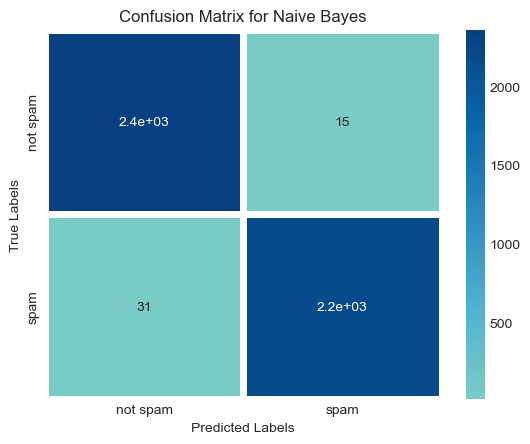

In [162]:
conf_mat = confusion_matrix(y_test,y_pred_nb)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,cmap="GnBu",center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion Matrix for Naive Bayes')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

### Support Vector Machine

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(kernel='sigmoid', gamma=1.0)

clfs = {'SVC' : svc}
def train(clf, features, targets):    
    clf.fit(features, targets)
def predict(clf, features):
    return (clf.predict(features))
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred_svm = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred_svm)]))

In [149]:
pred_scores_word_vectors

[('SVC', [0.9892872759073021])]

In [150]:
from sklearn.metrics import classification_report
print("Classification report")
print (classification_report(y_test, pred_svm))
print("Accuracy score: {}".format(round(accuracy_score(y_test,pred_svm),5)))
k2=round(accuracy_score(y_test,pred_svm),5)

Classification report
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99      2374
        spam       0.98      0.99      0.99      2200

    accuracy                           0.99      4574
   macro avg       0.99      0.99      0.99      4574
weighted avg       0.99      0.99      0.99      4574

Accuracy score: 0.98929


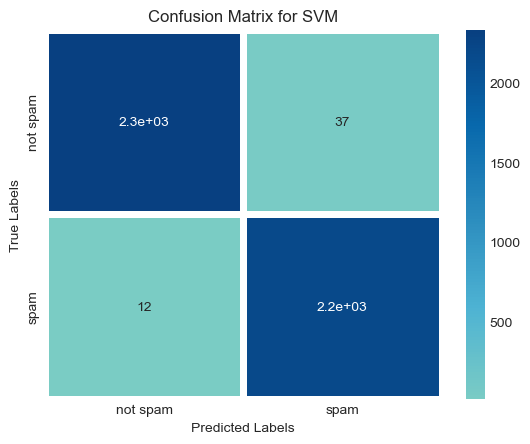

In [151]:
conf_mat = confusion_matrix(y_test,pred_svm)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,cmap="GnBu",center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion Matrix for SVM')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

### Random Forest

In [152]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [153]:
y_pred_rf = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred_rf, pos_label='spam', average='binary')

In [154]:
print(classification_report(y_test,y_pred_rf))
print("Accuracy score: {}".format(round(accuracy_score(y_test,y_pred_rf),5)))
k3=round(accuracy_score(y_test,y_pred_rf),5)

              precision    recall  f1-score   support

         ham       0.99      0.94      0.96      2374
        spam       0.94      0.99      0.96      2200

    accuracy                           0.96      4574
   macro avg       0.96      0.96      0.96      4574
weighted avg       0.96      0.96      0.96      4574

Accuracy score: 0.96152


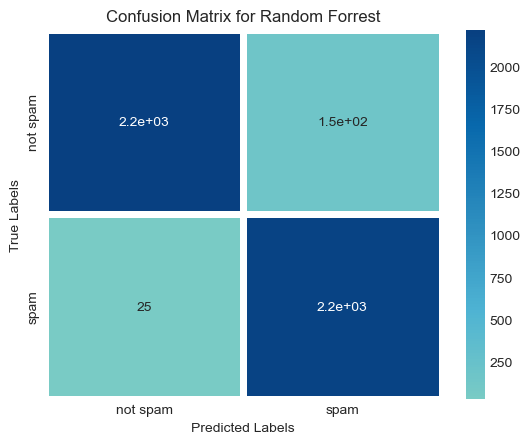

In [155]:
conf_mat = confusion_matrix(y_test,y_pred_rf)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,cmap="GnBu",center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion Matrix for Random Forrest')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

### KNN

In [156]:
from sklearn.neighbors import KNeighborsClassifier

In [157]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

clf = KNeighborsClassifier(n_neighbors=149, weights='uniform', algorithm='auto', p=1,metric='euclidean', n_jobs=-1)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
print(classification_report(y_test,y_pred_knn))
print("Accuracy score: {}".format(round(accuracy_score(y_test,y_pred_knn),5)));
k4=round(accuracy_score(y_test,y_pred_knn),5)

              precision    recall  f1-score   support

         ham       0.96      0.97      0.96      2374
        spam       0.96      0.96      0.96      2200

    accuracy                           0.96      4574
   macro avg       0.96      0.96      0.96      4574
weighted avg       0.96      0.96      0.96      4574

Accuracy score: 0.96218


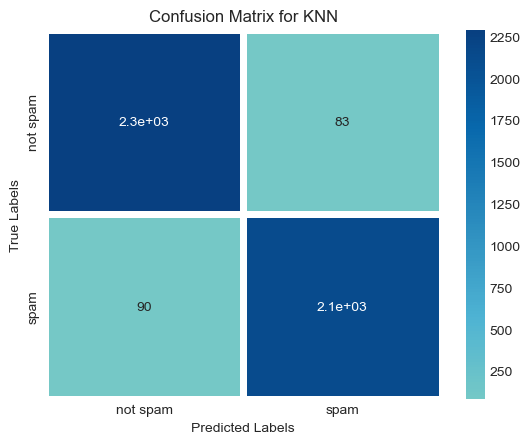

In [158]:
conf_mat = confusion_matrix(y_test,y_pred_knn)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,cmap="GnBu",center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion Matrix for KNN')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

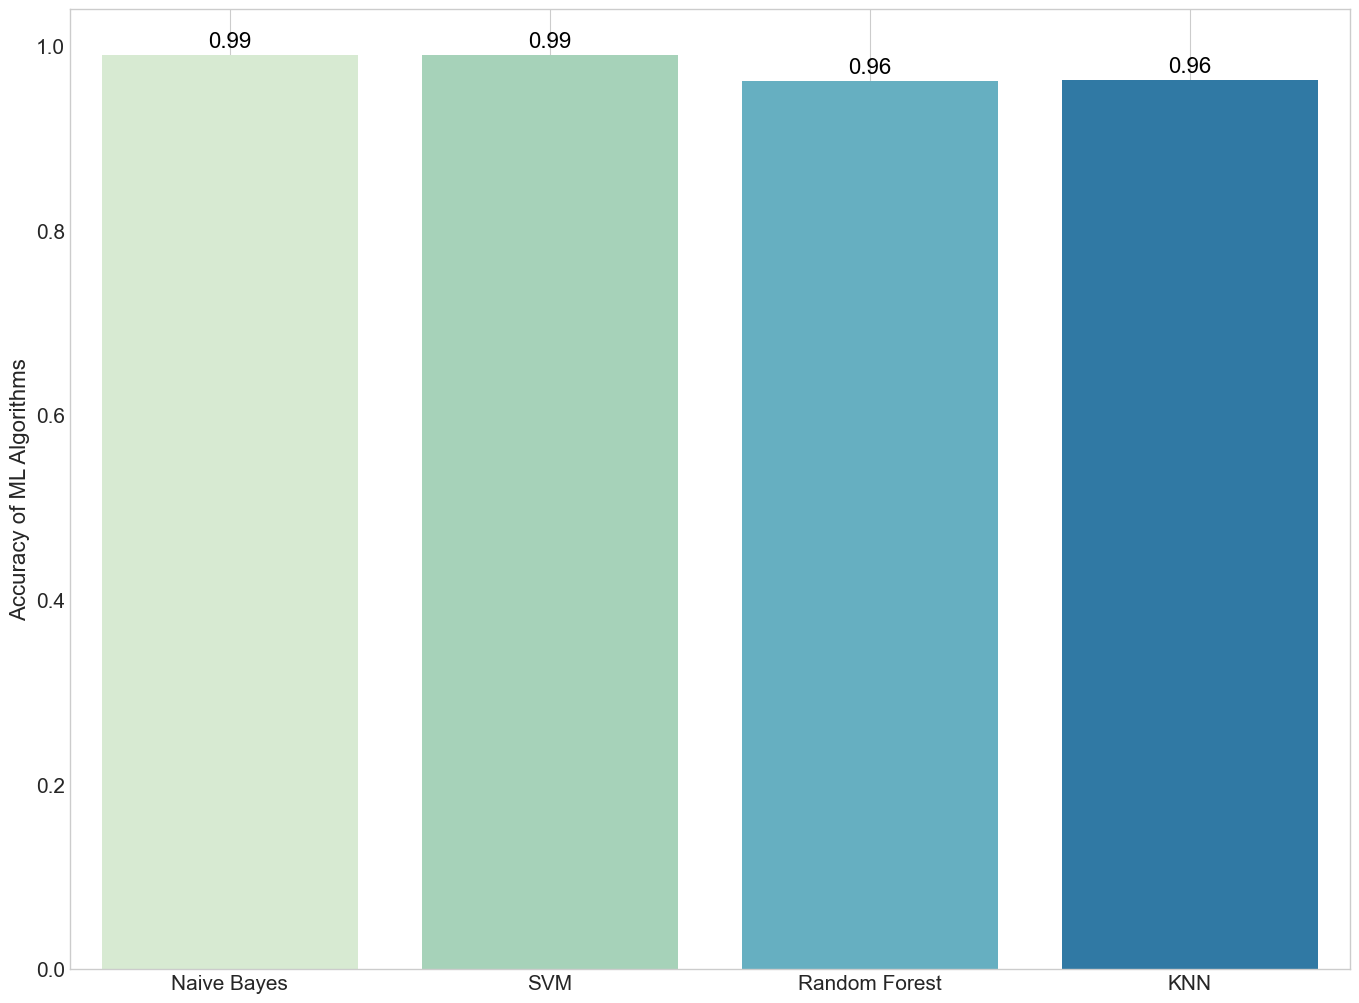

In [159]:
fig = plt.figure()
ax = fig.add_axes([1, 1, 2, 2])
warnings.filterwarnings("ignore", category=FutureWarning)

algos = ['Naive Bayes', 'SVM', 'Random Forest','KNN']
acc = [k1, k2, k3, k4]

gr = sns.barplot(x=algos, y=acc, palette="GnBu")

ax.set_ylabel("Accuracy of ML Algorithms", fontsize=16) 
ax.tick_params(labelsize=15)

for p in gr.patches:
    gr.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   fontsize=16, color='black', xytext = (0, 10),
                   textcoords = 'offset points')
    
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.grid()

plt.show()


### The accuracy of KNN and Random Forest algorithms is lower than that of Naive Bayes and SVM

## Extending the above classification model to a real world scenario:
To address the issue of important emails being wrongly marked as spam, which can lead to missed job offers, important messages, event updates, and more, a feedback loop is established. This loop involves collecting user feedback to determine whether an email is considered spam or not. This user input is then incorporated into the model continuously, allowing it to improve its predictions over time. To implement this, a real Gmail account is connected to the model, creating a mechanism for ongoing learning and more accurate email classification.

In [179]:
import pickle
with open('spam_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [180]:
pip install imapclient

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import imapclient

# Connect to Gmail's IMAP server
imap_server = imapclient.IMAPClient('imap.gmail.com', ssl=True)

imap_server.login('sammzz2003@gmail.com', 'qtbjqwyhbxsgprih')

imap_server.select_folder('INBOX', readonly=True)  

unseen_email_ids = imap_server.search('UNSEEN')

for email_id in unseen_email_ids:
    email_data = imap_server.fetch([email_id], ['BODY[]'])

imap_server.logout()


In [ ]:
import imaplib
import email
from email.header import decode_header

imap_server = imaplib.IMAP4_SSL('imap.gmail.com')
imap_server.login('sammzz2003@gmail.com', 'qtbjqwyhbxsgprih')

imap_server.select('inbox', readonly=True)  

status, email_ids = imap_server.search(None, 'UNSEEN')

for email_id in email_ids[0].split():
    status, email_data = imap_server.fetch(email_id, '(RFC822)')

    raw_email = email_data[0][1].decode('utf-8')
    msg = email.message_from_string(raw_email)

    subject, _ = decode_header(msg["Subject"])[0]
    sender, _ = decode_header(msg["From"])[0]

    if msg.is_multipart():
        for part in msg.walk():
            content_type = part.get_content_type()
            content_disposition = str(part.get("Content-Disposition"))

            if "attachment" not in content_disposition:
                body = part.get_payload(decode=True).decode('utf-8')
                print("Subject:", subject)
                print("Sender:", sender)
                print("Body:")
                print(body)
                print("===")

imap_server.logout()

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [ ]:
def preprocess_text(text):
    text = text.lower()
    
    tokens = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    preprocessed_text = ' '.join(lemmatized_tokens)
    
    return preprocessed_text


In [ ]:
if msg.is_multipart():
    for part in msg.walk():
        content_type = part.get_content_type()
        content_disposition = str(part.get("Content-Disposition"))

        if "attachment" not in content_disposition:
            body = part.get_payload(decode=True).decode('utf-8')
            
            preprocessed_body = preprocess_text(body)
            
            print("Subject:", subject)
            print("Sender:", sender)
            print("Preprocessed Body:")
            print(preprocessed_body)
            print("===")


In [ ]:
import pickle
with open('spam_model.pkl', 'rb') as model_file:
    spam_model = pickle.load(model_file)


In [ ]:
def classify_email(email_body, model):
    preprocessed_body = preprocess_text(email_body)
    
    prediction = model.predict([preprocessed_body])
    
    return prediction[0]


In [ ]:
if msg.is_multipart():
    for part in msg.walk():
        content_type = part.get_content_type()
        content_disposition = str(part.get("Content-Disposition"))

        if "attachment" not in content_disposition:
            body = part.get_payload(decode=True).decode('utf-8')
            
            classification = classify_email(body, spam_model)
            
            print("Subject:", subject)
            print("Sender:", sender)
            print("Preprocessed Body:")
            print(preprocessed_body)
            print("Classification: ", "Spam" if classification == 1 else "Not Spam")
            print("===")


In [ ]:
import imapclient

imap_server = imapclient.IMAPClient('imap.gmail.com', ssl=True)

imap_server.login('sammzz2003@gmail.com', 'qtbjqwyhbxsgprih')

imap_server.select_folder('INBOX', readonly=True)

unseen_email_ids = imap_server.search('UNSEEN')

user_feedback = {}

for email_id in unseen_email_ids:
    email_data = imap_server.fetch([email_id], ['BODY[]'])

    print("Subject:", subject)
    print("Sender:", sender)
    print("Preprocessed Body:")
    print(body)
    print("Classification: ", "Spam" if classification == 1 else "Not Spam")
    print("===")

    feedback = input("Is this email correctly classified? (yes/no): ")

    user_feedback[email_id] = feedback.lower()

imap_server.logout()